In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Rahi\Downloads\Heart Disease data\Heart Disease data.csv")

In [13]:
# Check for null values
null_values = data.isnull().sum()
print("Null Values:")
print(null_values)

Null Values:
age                     0
sex                     0
cp                      0
trestbps                0
chol                    0
fbs                     0
restecg                 0
thalach                 0
exang                   0
oldpeak                 0
slope                   0
ca                      0
thal                    0
target                  0
cholesterol_bp_ratio    0
dtype: int64


In [3]:
# Display summary statistics
print(data.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [4]:
# Feature Engineering (example)
data['cholesterol_bp_ratio'] = data['chol'] / data['trestbps']

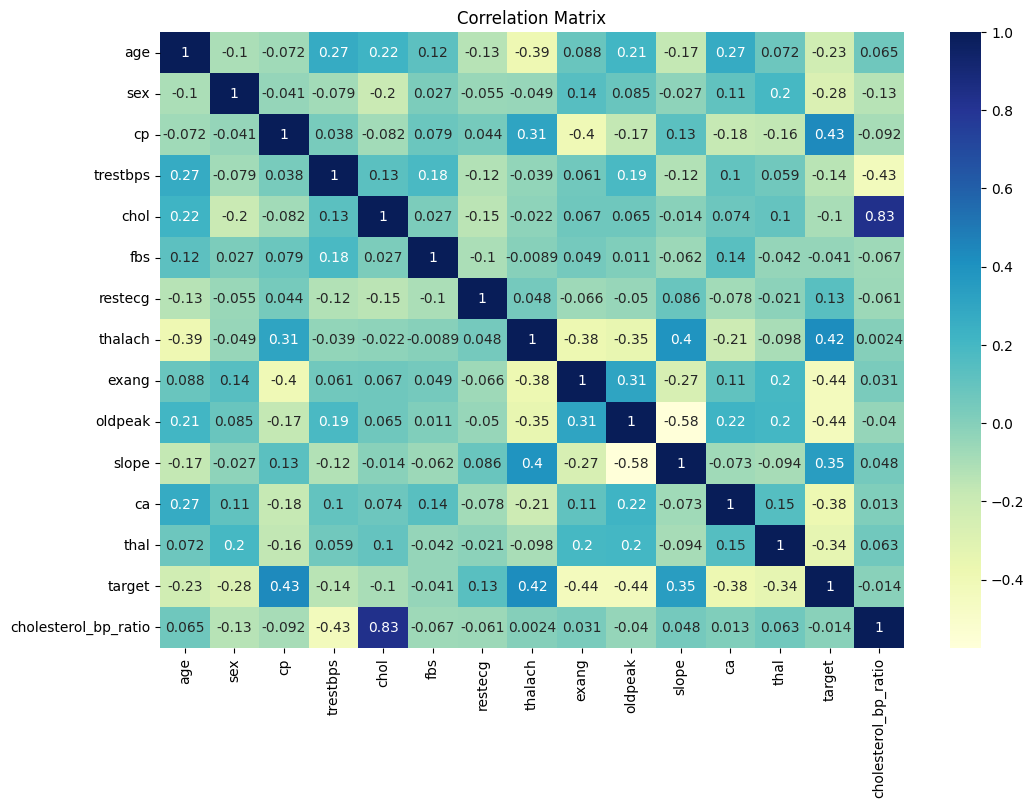

In [5]:
# Calculate correlations
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

This is a correlation matrix. We understand that chest pain, exercise induced by angina is most correlated to target variable. 

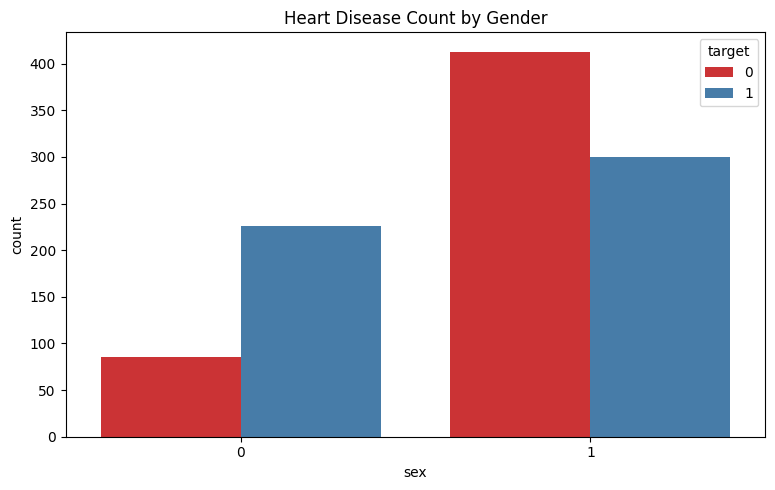

In [6]:
# Advanced Data Visualizations
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 2)
sns.countplot(x='sex', hue='target', data=data, palette='Set1')
plt.title("Heart Disease Count by Gender")

plt.tight_layout()
plt.show()

By this graph, we understand that in females have more chance to get a heart disease that males.


<Figure size 1000x600 with 0 Axes>

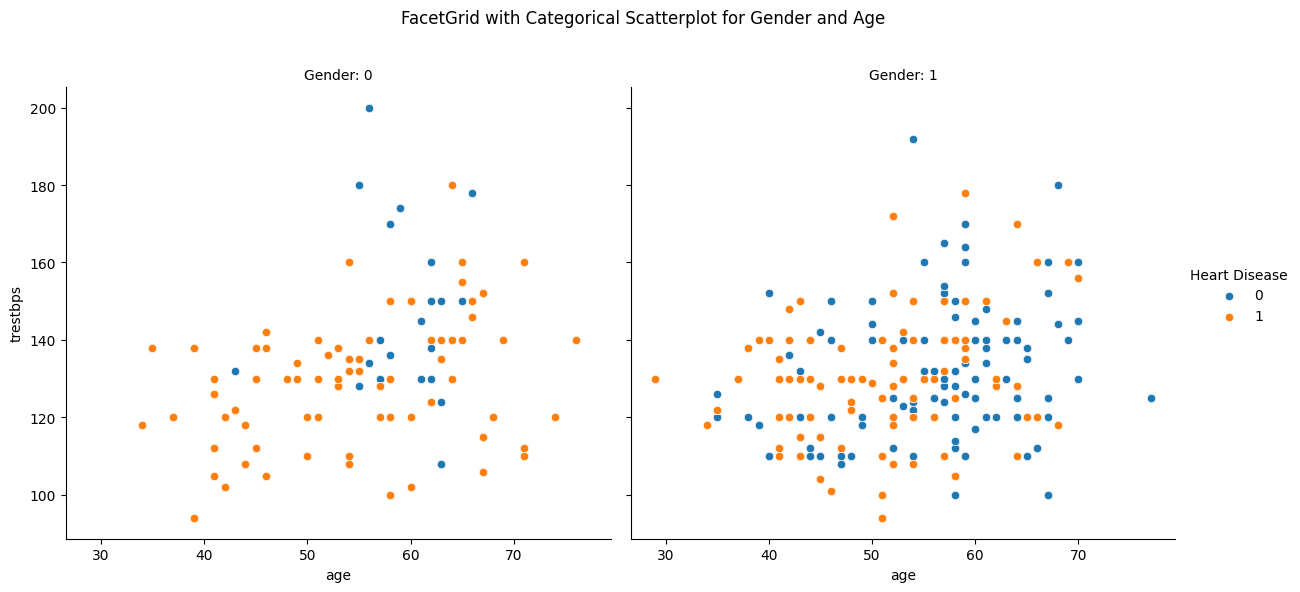

In [16]:
# FacetGrid with categorical scatterplot for gender and age
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(data, col='sex', hue='target', height=6)
g.map(sns.scatterplot, 'age', 'trestbps')
g.add_legend(title="Heart Disease")
g.set_titles("Gender: {col_name}")
plt.subplots_adjust(top=0.85)
plt.suptitle("FacetGrid with Categorical Scatterplot for Gender and Age")
plt.show()

This graph shows how both genders have high blood pressure as the age increases.


In [15]:
# Split data into train and test sets
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Model Building
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine (SVM)": SVC(kernel='rbf', C=1.0, gamma='scale'),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5)
}

C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


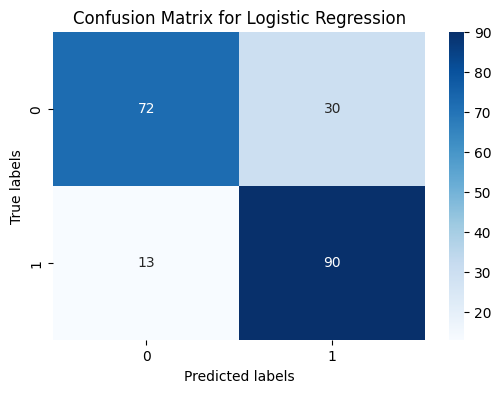

Model: Logistic Regression
Accuracy: 0.7902439024390244
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.71      0.77       102
           1       0.75      0.87      0.81       103

    accuracy                           0.79       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.79      0.79       205



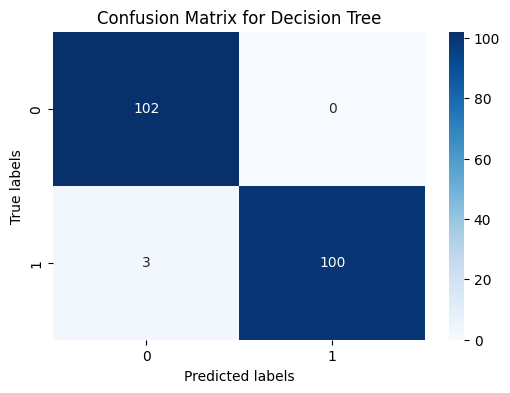

Model: Decision Tree
Accuracy: 0.9853658536585366
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



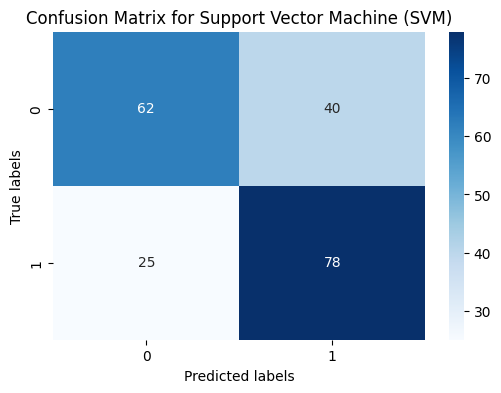

Model: Support Vector Machine (SVM)
Accuracy: 0.6829268292682927
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.61      0.66       102
           1       0.66      0.76      0.71       103

    accuracy                           0.68       205
   macro avg       0.69      0.68      0.68       205
weighted avg       0.69      0.68      0.68       205



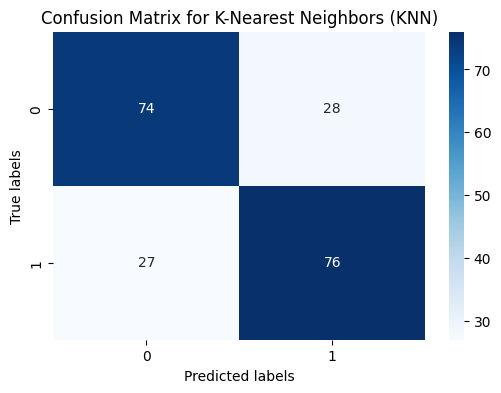

Model: K-Nearest Neighbors (KNN)
Accuracy: 0.7317073170731707
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



In [9]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    # Print model evaluation metrics
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("="*50)


The Decision Tree model exhibited superior performance with an accuracy of 98.5% and balanced precision and recall for both classes, making it the top-performing model. Logistic Regression followed closely with 79% accuracy and reasonably balanced precision and recall. SVM and KNN models showed lower accuracy, with SVM achieving 68.3% accuracy and balanced precision and recall, while KNN achieved 73.2% accuracy with balanced precision and recall. 

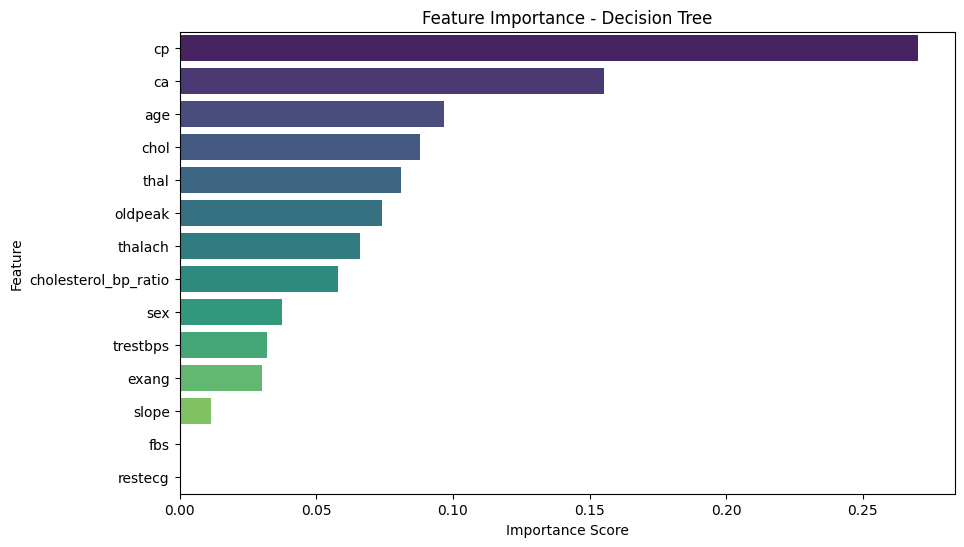

In [11]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X, y)

# Get feature importance
feature_importance = dt_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


The feature importance analysis conducted using the Decision Tree model reveals that attributes such as 'ca' (number of major vessels colored by fluoroscopy), 'cp' (chest pain type), 'age', and 'thal' (thalassemia) are the most influential features in predicting heart disease. This suggests that factors related to cardiac health, including the number of affected vessels, chest pain characteristics, age, and thalassemia status, play significant roles in determining the presence or absence of heart disease, highlighting their importance in diagnostic analysis.